### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Requirement #1: Reading Data In
For this project I want to start with loading in a
dataframe that measures the total amount of 
pregnancies and the total amount of births in 
each state in the United States.

In [2]:
df = pd.read_csv('data_files/total_pregnancies.csv')
df.head(100)

,measure_name,datum,state_id,state_name,first_year,last_year,footnotes,sources
0,No. of pregnancies ending in birth,10445,AK,Alaska,2017,NaN,NaN,"Maddow-Zimet I and Kost K, <i>Pregnancies, Bir..."
1,No. of pregnancies ending in birth,58941,AL,Alabama,2017,NaN,NaN,"Maddow-Zimet I and Kost K, <i>Pregnancies, Bir..."
2,No. of pregnancies ending in birth,37520,AR,Arkansas,2017,NaN,NaN,"Maddow-Zimet I and Kost K, <i>Pregnancies, Bir..."
3,No. of pregnancies ending in birth,81872,AZ,Arizona,2017,NaN,NaN,"Maddow-Zimet I and Kost K, <i>Pregnancies, Bir..."
4,No. of pregnancies ending in birth,471658,CA,California,2017,NaN,NaN,"Maddow-Zimet I and Kost K, <i>Pregnancies, Bir..."
...,...,...,...,...,...,...,...,...
95,Total no. of pregnancies among women aged 15-44,8040,VT,Vermont,2017,NaN,NaN,"Maddow-Zimet I and Kost K, <i>Pregnancies, Bir..."
96,Total no. of pregnancies among women aged 15-44,124610,WA,Washington,2017,NaN,NaN,"Maddow-Zimet I and Kost K, <i>Pregnancies, Bir..."
97,Total no. of pregnancies among women aged 15-44,86260,WI,Wisconsin,2017,NaN,NaN,"Maddow-Zimet I and Kost K, <i>Pregnancies, Bir..."
98,Total no. of pregnancies among women aged 15-44,25030,WV,West Virginia,2017,NaN,NaN,"Maddow-Zimet I and Kost K, <i>Pregnancies, Bir..."


### Requirement #2: Manipulating and Cleaning Data


I want to change the name of column 'state_id' to 'state_abrv'.

In [3]:
# Renaming the 'state_id' column.
df.rename(columns={'state_id':'state_abrv'}, inplace=True)
df.head()

,measure_name,datum,state_abrv,state_name,first_year,last_year,footnotes,sources
0,No. of pregnancies ending in birth,10445,AK,Alaska,2017,NaN,NaN,"Maddow-Zimet I and Kost K, <i>Pregnancies, Bir..."
1,No. of pregnancies ending in birth,58941,AL,Alabama,2017,NaN,NaN,"Maddow-Zimet I and Kost K, <i>Pregnancies, Bir..."
2,No. of pregnancies ending in birth,37520,AR,Arkansas,2017,NaN,NaN,"Maddow-Zimet I and Kost K, <i>Pregnancies, Bir..."
3,No. of pregnancies ending in birth,81872,AZ,Arizona,2017,NaN,NaN,"Maddow-Zimet I and Kost K, <i>Pregnancies, Bir..."
4,No. of pregnancies ending in birth,471658,CA,California,2017,NaN,NaN,"Maddow-Zimet I and Kost K, <i>Pregnancies, Bir..."


I want to delete the 'first_year', 'last_year', 'footnotes', and 'sources' columns because they are not useful to the project.

In [4]:
# Deleting columns.
df.drop(columns=['first_year', 'last_year', 'footnotes', 'sources'], inplace=True)
df.head()

,measure_name,datum,state_abrv,state_name
0,No. of pregnancies ending in birth,10445,AK,Alaska
1,No. of pregnancies ending in birth,58941,AL,Alabama
2,No. of pregnancies ending in birth,37520,AR,Arkansas
3,No. of pregnancies ending in birth,81872,AZ,Arizona
4,No. of pregnancies ending in birth,471658,CA,California


The 'measure_name' column identifies what our datum column is measuring. It also measures two different variables. I want the variables split into two dataframes.

In [5]:
# Creating two dataframes.
df_us_2017 = df.iloc[0:50,:].copy()
df_change = df.iloc[50:,:].copy()

In [6]:
df_us_2017.head()

,measure_name,datum,state_abrv,state_name
0,No. of pregnancies ending in birth,10445,AK,Alaska
1,No. of pregnancies ending in birth,58941,AL,Alabama
2,No. of pregnancies ending in birth,37520,AR,Arkansas
3,No. of pregnancies ending in birth,81872,AZ,Arizona
4,No. of pregnancies ending in birth,471658,CA,California


In [7]:
df_change.head()

,measure_name,datum,state_abrv,state_name
50,Total no. of pregnancies among women aged 15-44,14090,AK,Alaska
51,Total no. of pregnancies among women aged 15-44,79150,AL,Alabama
52,Total no. of pregnancies among women aged 15-44,49110,AR,Arkansas
53,Total no. of pregnancies among women aged 15-44,112840,AZ,Arizona
54,Total no. of pregnancies among women aged 15-44,710510,CA,California


I want to rename the 'datum' column in each dataframe to 'total_births' and 'total_pregnancies'.

In [8]:
# Renaming 'datum' in each dataframe to 'total_births' and 'total_pregnancies'.
df_us_2017.rename(columns={'datum':'total_births'}, inplace=True)
df_change.rename(columns={'datum':'total_pregnancies'}, inplace=True)

In [9]:
df_us_2017.head()

,measure_name,total_births,state_abrv,state_name
0,No. of pregnancies ending in birth,10445,AK,Alaska
1,No. of pregnancies ending in birth,58941,AL,Alabama
2,No. of pregnancies ending in birth,37520,AR,Arkansas
3,No. of pregnancies ending in birth,81872,AZ,Arizona
4,No. of pregnancies ending in birth,471658,CA,California


In [10]:
df_change.head()

,measure_name,total_pregnancies,state_abrv,state_name
50,Total no. of pregnancies among women aged 15-44,14090,AK,Alaska
51,Total no. of pregnancies among women aged 15-44,79150,AL,Alabama
52,Total no. of pregnancies among women aged 15-44,49110,AR,Arkansas
53,Total no. of pregnancies among women aged 15-44,112840,AZ,Arizona
54,Total no. of pregnancies among women aged 15-44,710510,CA,California


I have to reset the index in df_change in order to combine it with df_us_2017.

In [11]:
# Resetting index to 0:49 instead of 50:99.
df_col = df_change['total_pregnancies'].reset_index()
df_col.head()

,index,total_pregnancies
0,50,14090
1,51,79150
2,52,49110
3,53,112840
4,54,710510


I want to drop the new 'index' column it creates.

In [12]:
# Dropping the new 'index' column.
df_col.drop(columns='index', inplace=True)
df_col.head()

,total_pregnancies
0,14090
1,79150
2,49110
3,112840
4,710510


I want to extract the 'total_pregnancies' column from the df_change and combine it with df_us_2017.

In [13]:
# Adding the 'total_pregnancies' column to the main dataframe.
df_us_2017['total_pregnancies'] = df_col['total_pregnancies'].copy()
df_us_2017.head()

,measure_name,total_births,state_abrv,state_name,total_pregnancies
0,No. of pregnancies ending in birth,10445,AK,Alaska,14090
1,No. of pregnancies ending in birth,58941,AL,Alabama,79150
2,No. of pregnancies ending in birth,37520,AR,Arkansas,49110
3,No. of pregnancies ending in birth,81872,AZ,Arizona,112840
4,No. of pregnancies ending in birth,471658,CA,California,710510


I want to delete the 'measure_name' column from the dataframe.

In [14]:
# 8. Dropping the 'measure_name' column.
df_us_2017.drop(columns='measure_name', inplace=True)
df_us_2017.head()

,total_births,state_abrv,state_name,total_pregnancies
0,10445,AK,Alaska,14090
1,58941,AL,Alabama,79150
2,37520,AR,Arkansas,49110
3,81872,AZ,Arizona,112840
4,471658,CA,California,710510


Now I want to add in the total population of women in each state from a separate csv to the main dataframe.

In [15]:
# Reading in women_population.csv
df_pop = pd.read_csv('data_files/women_population.csv')
df_pop.head(100)

,measure_name,datum,state_id,state_name,first_year,last_year,footnotes,sources
0,Population of women aged 13-44,1014030,AL,Alabama,2016,NaN,NaN,Publicly Supported Family Planning Services in...
1,Population of women aged 13-44,155560,AK,Alaska,2016,NaN,NaN,Publicly Supported Family Planning Services in...
2,Population of women aged 13-44,1418140,AZ,Arizona,2016,NaN,NaN,Publicly Supported Family Planning Services in...
3,Population of women aged 13-44,614890,AR,Arkansas,2016,NaN,NaN,Publicly Supported Family Planning Services in...
4,Population of women aged 13-44,8557280,CA,California,2016,NaN,NaN,Publicly Supported Family Planning Services in...
...,...,...,...,...,...,...,...,...
95,Total no. of women aged 15-44,1681168,VA,Virginia,2017,NaN,NaN,"National Center for Health Statistics, Vintage..."
96,Total no. of women aged 15-44,1464754,WA,Washington,2017,NaN,NaN,"National Center for Health Statistics, Vintage..."
97,Total no. of women aged 15-44,322254,WV,West Virginia,2017,NaN,NaN,"National Center for Health Statistics, Vintage..."
98,Total no. of women aged 15-44,1083819,WI,Wisconsin,2017,NaN,NaN,"National Center for Health Statistics, Vintage..."


I want to change the name of column 'state_id' to 'state_abrv'.

In [16]:
# Renaming 'state_id' column to 'state_abrv'.
df_pop.rename(columns={'state_id':'state_abrv'}, inplace=True)
df_pop.head()

,measure_name,datum,state_abrv,state_name,first_year,last_year,footnotes,sources
0,Population of women aged 13-44,1014030,AL,Alabama,2016,NaN,NaN,Publicly Supported Family Planning Services in...
1,Population of women aged 13-44,155560,AK,Alaska,2016,NaN,NaN,Publicly Supported Family Planning Services in...
2,Population of women aged 13-44,1418140,AZ,Arizona,2016,NaN,NaN,Publicly Supported Family Planning Services in...
3,Population of women aged 13-44,614890,AR,Arkansas,2016,NaN,NaN,Publicly Supported Family Planning Services in...
4,Population of women aged 13-44,8557280,CA,California,2016,NaN,NaN,Publicly Supported Family Planning Services in...


I want to delete the 'first_year', 'last_year', 'footnotes', and 'sources' columns because they are not useful to the project.

In [17]:
# Deleting columns.
df_pop.drop(columns=['first_year', 'last_year', 'footnotes', 'sources'], inplace=True)
df_pop.head()

,measure_name,datum,state_abrv,state_name
0,Population of women aged 13-44,1014030,AL,Alabama
1,Population of women aged 13-44,155560,AK,Alaska
2,Population of women aged 13-44,1418140,AZ,Arizona
3,Population of women aged 13-44,614890,AR,Arkansas
4,Population of women aged 13-44,8557280,CA,California


The 'measure_name' column identifies what our 'datum' column is measuring. I am going to create a dataframe using the data labelled "Total no. of women aged 15-44" from index [50:], because it is from 2017 like my previous dataframes.

In [18]:
# 3. Creating the needed dataframe.
df_usable = df_pop.iloc[50:,:].copy()
df_usable.head()

,measure_name,datum,state_abrv,state_name
50,Total no. of women aged 15-44,949949,AL,Alabama
51,Total no. of women aged 15-44,146072,AK,Alaska
52,Total no. of women aged 15-44,1345764,AZ,Arizona
53,Total no. of women aged 15-44,577447,AR,Arkansas
54,Total no. of women aged 15-44,8104632,CA,California


I want to rename the 'datum' column in the usable dataframe to 'women_pop_15-44'.

In [19]:
# Renaming the 'datum' column.
df_usable.rename(columns={'datum':'women_pop_15-44'}, inplace=True)
df_usable.head()

,measure_name,women_pop_15-44,state_abrv,state_name
50,Total no. of women aged 15-44,949949,AL,Alabama
51,Total no. of women aged 15-44,146072,AK,Alaska
52,Total no. of women aged 15-44,1345764,AZ,Arizona
53,Total no. of women aged 15-44,577447,AR,Arkansas
54,Total no. of women aged 15-44,8104632,CA,California


At this point I realized this csv data is sorted by the state name. The previous csv is sorted by the state abbreviation. I need to sort this data by the state abbreviation before going further.

In [20]:
# Sorting values by the 'state_abrv' column.
df_usable.sort_values(by='state_abrv', inplace=True)
df_usable.head()

,measure_name,women_pop_15-44,state_abrv,state_name
51,Total no. of women aged 15-44,146072,AK,Alaska
50,Total no. of women aged 15-44,949949,AL,Alabama
53,Total no. of women aged 15-44,577447,AR,Arkansas
52,Total no. of women aged 15-44,1345764,AZ,Arizona
54,Total no. of women aged 15-44,8104632,CA,California


I have to reset the index in df_usable. 

In [ ]:
# Resetting the index.
df_col2 = df_usable['women_pop_15-44'].reset_index()
df_col2.head()

,index,women_pop_15-44
0,51,146072
1,50,949949
2,53,577447
3,52,1345764
4,54,8104632


I want to drop the new 'index' column it creates.

In [22]:
# Dropping the 'index' column.
df_col2.drop(columns='index', inplace=True)
df_col2.head()

,women_pop_15-44
0,146072
1,949949
2,577447
3,1345764
4,8104632


I want to extract the 'women_pop_15-44' column from df_usable and combine it with df_us_2017.

In [23]:
# Adding the 'women_pop_15-44' column to df_us_2017.
df_us_2017['women_pop_15-44'] = df_col2['women_pop_15-44'].copy()
df_us_2017.head()

,total_births,state_abrv,state_name,total_pregnancies,women_pop_15-44
0,10445,AK,Alaska,14090,146072
1,58941,AL,Alabama,79150,949949
2,37520,AR,Arkansas,49110,577447
3,81872,AZ,Arizona,112840,1345764
4,471658,CA,California,710510,8104632


I want the index of my dataframes to make the data easy to identify. The best solution is to make the 'state_abrv' column the index.

In [24]:
# Setting index to state abbreviations.
df_us_2017.set_index(['state_abrv'], inplace=True)
df_us_2017.head()

,total_births,state_name,total_pregnancies,women_pop_15-44
state_abrv,,,,
AK,10445,Alaska,14090,146072
AL,58941,Alabama,79150,949949
AR,37520,Arkansas,49110,577447
AZ,81872,Arizona,112840,1345764
CA,471658,California,710510,8104632


I want to move my 'state_name' column next to my 'state_abrv' index for clarity in grouping.

In [25]:
# Moving columns.
df_us_2017 = df_us_2017[['state_name', 'total_pregnancies', 'total_births', 'women_pop_15-44']]
df_us_2017.head()


,state_name,total_pregnancies,total_births,women_pop_15-44
state_abrv,,,,
AK,Alaska,14090,10445,146072
AL,Alabama,79150,58941,949949
AR,Arkansas,49110,37520,577447
AZ,Arizona,112840,81872,1345764
CA,California,710510,471658,8104632


### Requirement #3: Analyzing Data

Lets divide our data by US Census Regions: West, Midwest, Northeast, and South.

In [26]:
# Creating df_west_2017
df_west_2017 = df_us_2017.loc(axis=0)['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NM', 'NV', 'OR', 'UT', 'WA', 'WY']
df_west_2017

,state_name,total_pregnancies,total_births,women_pop_15-44
state_abrv,,,,
AK,Alaska,14090,10445,146072
AZ,Arizona,112840,81872,1345764
CA,California,710510,471658,8104632
CO,Colorado,89470,64382,1137745
HI,Hawaii,24560,17517,265924
ID,Idaho,28580,22181,328941
MT,Montana,15820,11799,190089
NM,New Mexico,32730,23767,395286
NV,Nevada,53490,35756,589149


In [27]:
# Creating df_midwest_2017
df_midwest_2017 = df_us_2017.loc(axis=0)['IA', 'IL', 'IN', 'KS', 'MI', 'MN', 'MO', 'ND', 'NE', 'OH', 'SD', 'WI']
df_midwest_2017

,state_name,total_pregnancies,total_births,women_pop_15-44
state_abrv,,,,
IA,Iowa,50130,38430,592278
IL,Illinois,220810,149390,2532027
IN,Indiana,109910,82170,1295622
KS,Kansas,47700,36519,558606
MI,Michigan,162450,111426,1874298
MN,Minnesota,93430,68595,1066806
MO,Missouri,98310,73034,1171775
ND,North Dakota,13950,10737,146282
NE,Nebraska,33460,25821,370172


In [28]:
# Creating df_northeast_2017
df_northeast_2017 = df_us_2017.loc(axis=0)['CT', 'MA', 'ME', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
df_northeast_2017

,state_name,total_pregnancies,total_births,women_pop_15-44
state_abrv,,,,
CT,Connecticut,55410,35221,672949
MA,Massachusetts,105610,70702,1381812
ME,Maine,17010,12298,231535
NH,New Hampshire,17110,12116,241346
NJ,New Jersey,173210,101250,1715123
NY,New York,389050,229737,4001053
PA,Pennsylvania,202590,137745,2383721
RI,Rhode Island,16380,10638,209072
VT,Vermont,8040,5655,113854


In [29]:
# Creating df_south_2017
df_south_2017 = df_us_2017.loc(axis=0)['AL', 'AR', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']
df_south_2017

,state_name,total_pregnancies,total_births,women_pop_15-44
state_abrv,,,,
AL,Alabama,79150,58941,949949
AR,Arkansas,49110,37520,577447
DE,Delaware,16070,10855,180343
FL,Florida,343850,223630,3828199
GA,Georgia,190870,129243,2147399
KY,Kentucky,70960,54752,848472
LA,Louisiana,83430,61018,936106
MD,Maryland,115600,71641,1193286
MS,Mississippi,50250,37357,591744


I want to get the total value of each column in each dataframe. Lets apply a sum function to each dataframe.

In [30]:
# Using the apply method to apply the sum method to each column in the US dataframe.
df_us_2017.loc['US'] = df_us_2017.apply(lambda x:x.sum(), axis=0)
df_us_2017.tail()

,state_name,total_pregnancies,total_births,women_pop_15-44
state_abrv,,,,
WA,Washington,124610,87562,1464754
WI,Wisconsin,86260,64975,1083819
WV,West Virginia,25030,18675,322254
WY,Wyoming,9080,6903,107740
US,AlaskaAlabamaArkansasArizonaCaliforniaColorado...,5557750,3845940,63771779


In [31]:
# Using the apply method to apply the sum method to each column in the West dataframe.
df_west_2017.loc['W'] = df_west_2017.apply(lambda x:x.sum(), axis=0)
df_west_2017.tail()

,state_name,total_pregnancies,total_births,women_pop_15-44
state_abrv,,,,
OR,Oregon,62200,43631,810399
UT,Utah,61620,48585,675124
WA,Washington,124610,87562,1464754
WY,Wyoming,9080,6903,107740
W,AlaskaArizonaCaliforniaColoradoHawaiiIdahoMont...,1339600,926058,15561619


In [32]:
# Using the apply method to apply the sum method to each column in the Midwest dataframe.
df_midwest_2017.loc['MW'] = df_midwest_2017.apply(lambda x:x.sum(), axis=0)
df_midwest_2017.tail()

,state_name,total_pregnancies,total_births,women_pop_15-44
state_abrv,,,,
NE,Nebraska,33460,25821,370172
OH,Ohio,186820,136832,2203285
SD,South Dakota,15380,12134,158874
WI,Wisconsin,86260,64975,1083819
MW,IowaIllinoisIndianaKansasMichiganMinnesotaMiss...,1118610,810063,13053844


In [33]:
# Using the apply method to apply the sum method to each column in the Northeast dataframe.
df_northeast_2017.loc['NE'] = df_northeast_2017.apply(lambda x:x.sum(), axis=0)
df_northeast_2017.tail()

,state_name,total_pregnancies,total_births,women_pop_15-44
state_abrv,,,,
NY,New York,389050,229737,4001053
PA,Pennsylvania,202590,137745,2383721
RI,Rhode Island,16380,10638,209072
VT,Vermont,8040,5655,113854
NE,ConnecticutMassachusettsMaineNew HampshireNew ...,984410,615362,10950465


In [34]:
# Using the apply method to apply the sum method to each column in the South dataframe.
df_south_2017.loc['S'] = df_south_2017.apply(lambda x:x.sum(), axis=0)
df_south_2017.tail()

,state_name,total_pregnancies,total_births,women_pop_15-44
state_abrv,,,,
TN,Tennessee,109390,81016,1312517
TX,Texas,520440,382050,5885855
VA,Virginia,142780,100391,1681168
WV,West Virginia,25030,18675,322254
S,AlabamaArkansasDelawareFloridaGeorgiaKentuckyL...,2115130,1494457,24205851


The 'state_name' row needs to be changed for each dataframe to the United States, West, Midwest, Northeast, and South, respectively.

In [35]:
# Changing the 'state_name' row for the US dataframe.
df_us_2017.loc['US', 'state_name'] = 'United States'
df_us_2017.tail()

,state_name,total_pregnancies,total_births,women_pop_15-44
state_abrv,,,,
WA,Washington,124610,87562,1464754
WI,Wisconsin,86260,64975,1083819
WV,West Virginia,25030,18675,322254
WY,Wyoming,9080,6903,107740
US,United States,5557750,3845940,63771779


In [36]:
# Changing the 'state_name' row for the West dataframe.
df_west_2017.loc['W', 'state_name'] = 'West'
df_west_2017.tail()

,state_name,total_pregnancies,total_births,women_pop_15-44
state_abrv,,,,
OR,Oregon,62200,43631,810399
UT,Utah,61620,48585,675124
WA,Washington,124610,87562,1464754
WY,Wyoming,9080,6903,107740
W,West,1339600,926058,15561619


In [37]:
# Changing the 'state_name' row for the Midwest dataframe.
df_midwest_2017.loc['MW', 'state_name'] = 'Midwest'
df_midwest_2017.tail()

,state_name,total_pregnancies,total_births,women_pop_15-44
state_abrv,,,,
NE,Nebraska,33460,25821,370172
OH,Ohio,186820,136832,2203285
SD,South Dakota,15380,12134,158874
WI,Wisconsin,86260,64975,1083819
MW,Midwest,1118610,810063,13053844


In [38]:
# Changing the 'state_name' row for the Northeast dataframe.
df_northeast_2017.loc['NE', 'state_name'] = 'Northeast'
df_northeast_2017.tail()

,state_name,total_pregnancies,total_births,women_pop_15-44
state_abrv,,,,
NY,New York,389050,229737,4001053
PA,Pennsylvania,202590,137745,2383721
RI,Rhode Island,16380,10638,209072
VT,Vermont,8040,5655,113854
NE,Northeast,984410,615362,10950465


In [39]:
# Changing the 'state_name' row for the South dataframe.
df_south_2017.loc['S', 'state_name'] = 'South'
df_south_2017.tail()

,state_name,total_pregnancies,total_births,women_pop_15-44
state_abrv,,,,
TN,Tennessee,109390,81016,1312517
TX,Texas,520440,382050,5885855
VA,Virginia,142780,100391,1681168
WV,West Virginia,25030,18675,322254
S,South,2115130,1494457,24205851


I want to find the percentages for total pregnancies and total births compared to the population of women ages 15-44 for each of my dataframes. First, I define a percentage function.

In [40]:
# Defining a percentage function.
def percentage(x,y):
    return (x/y) * 100 

Now I create a new columns for each dataframe using the apply method.

In [41]:
# Creating new percentage columns with the apply method on the US dataframe.
df_us_2017['PctTotalPregnancies'] = df_us_2017.apply(lambda x: percentage(x['total_pregnancies'], x['women_pop_15-44']), axis=1)
df_us_2017['PctTotalBirths'] = df_us_2017.apply(lambda x: percentage(x['total_births'], x['women_pop_15-44']), axis=1)
df_us_2017.tail()

,state_name,total_pregnancies,total_births,women_pop_15-44,PctTotalPregnancies,PctTotalBirths
state_abrv,,,,,,
WA,Washington,124610,87562,1464754,8.507231,5.977932
WI,Wisconsin,86260,64975,1083819,7.958894,5.995005
WV,West Virginia,25030,18675,322254,7.767165,5.795118
WY,Wyoming,9080,6903,107740,8.427696,6.407091
US,United States,5557750,3845940,63771779,8.715062,6.030787


In [42]:
# Creating new percentage columns with the apply method on the West dataframe.
df_west_2017['PctTotalPregnancies'] = df_west_2017.apply(lambda x: percentage(x['total_pregnancies'], x['women_pop_15-44']), axis=1)
df_west_2017['PctTotalBirths'] = df_west_2017.apply(lambda x: percentage(x['total_births'], x['women_pop_15-44']), axis=1)
df_west_2017.tail()

,state_name,total_pregnancies,total_births,women_pop_15-44,PctTotalPregnancies,PctTotalBirths
state_abrv,,,,,,
OR,Oregon,62200,43631,810399,7.675232,5.383891
UT,Utah,61620,48585,675124,9.127212,7.196456
WA,Washington,124610,87562,1464754,8.507231,5.977932
WY,Wyoming,9080,6903,107740,8.427696,6.407091
W,West,1339600,926058,15561619,8.608359,5.950910


In [43]:
# Creating new percentage columns with the apply method on the Midwest dataframe.
df_midwest_2017['PctTotalPregnancies'] = df_midwest_2017.apply(lambda x: percentage(x['total_pregnancies'], x['women_pop_15-44']), axis=1)
df_midwest_2017['PctTotalBirths'] = df_midwest_2017.apply(lambda x: percentage(x['total_births'], x['women_pop_15-44']), axis=1)
df_midwest_2017.tail()

,state_name,total_pregnancies,total_births,women_pop_15-44,PctTotalPregnancies,PctTotalBirths
state_abrv,,,,,,
NE,Nebraska,33460,25821,370172,9.039041,6.975406
OH,Ohio,186820,136832,2203285,8.479157,6.210363
SD,South Dakota,15380,12134,158874,9.680627,7.637499
WI,Wisconsin,86260,64975,1083819,7.958894,5.995005
MW,Midwest,1118610,810063,13053844,8.569200,6.205551


In [44]:
# Creating new percentage columns with the apply method on the Northeast dataframe.
df_northeast_2017['PctTotalPregnancies'] = df_northeast_2017.apply(lambda x: percentage(x['total_pregnancies'], x['women_pop_15-44']), axis=1)
df_northeast_2017['PctTotalBirths'] = df_northeast_2017.apply(lambda x: percentage(x['total_births'], x['women_pop_15-44']), axis=1)
df_northeast_2017.tail()

,state_name,total_pregnancies,total_births,women_pop_15-44,PctTotalPregnancies,PctTotalBirths
state_abrv,,,,,,
NY,New York,389050,229737,4001053,9.723690,5.741913
PA,Pennsylvania,202590,137745,2383721,8.498897,5.778571
RI,Rhode Island,16380,10638,209072,7.834622,5.088199
VT,Vermont,8040,5655,113854,7.061675,4.966887
NE,Northeast,984410,615362,10950465,8.989664,5.619506


In [45]:
# Creating new percentage columns with the apply method on the South dataframe.
df_south_2017['PctTotalPregnancies'] = df_south_2017.apply(lambda x: percentage(x['total_pregnancies'], x['women_pop_15-44']), axis=1)
df_south_2017['PctTotalBirths'] = df_south_2017.apply(lambda x: percentage(x['total_births'], x['women_pop_15-44']), axis=1)
df_south_2017.tail()

,state_name,total_pregnancies,total_births,women_pop_15-44,PctTotalPregnancies,PctTotalBirths
state_abrv,,,,,,
TN,Tennessee,109390,81016,1312517,8.334368,6.172568
TX,Texas,520440,382050,5885855,8.842216,6.490986
VA,Virginia,142780,100391,1681168,8.492905,5.971503
WV,West Virginia,25030,18675,322254,7.767165,5.795118
S,South,2115130,1494457,24205851,8.738094,6.173949


### Requirement #4: Visualize Data

Now I will create a dataframe from the last row in each dataframe.

In [46]:
# Creating a dataframe from the last row in each dataframe.
df_pcts_2017 = pd.concat([df_us_2017.loc['US'], df_west_2017.loc['W'], df_midwest_2017.loc['MW'], df_northeast_2017.loc['NE'], df_south_2017.loc['S']], axis=1)
df_pcts_2017

,US,W,MW,NE,S
state_name,United States,West,Midwest,Northeast,South
total_pregnancies,5557750,1339600,1118610,984410,2115130
total_births,3845940,926058,810063,615362,1494457
women_pop_15-44,63771779,15561619,13053844,10950465,24205851
PctTotalPregnancies,8.715062,8.608359,8.5692,8.989664,8.738094
PctTotalBirths,6.030787,5.95091,6.205551,5.619506,6.173949


I want to visualize the 'total_pregnancies' and 'total_births' rows.

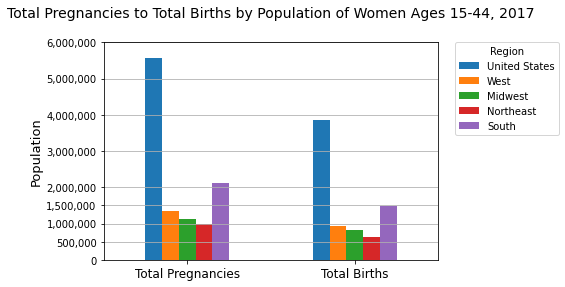

In [52]:
df_pcts_2017.loc[['total_pregnancies', 'total_births']].plot(kind='bar')
y = [0, 500000, 1000000, 1500000, 2000000, 3000000, 4000000, 5000000, 6000000] # Making a list to set yticks.
plt.title('Total Pregnancies to Total Births by Population of Women Ages 15-44, 2017', pad=25, fontsize=14)
plt.legend(['United States', 'West', 'Midwest', 'Northeast', 'South'], title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) # Moving legend clear of graph.
plt.xticks(ticks=[0,1], labels=['Total Pregnancies', 'Total Births'], rotation = 0, fontsize=12)
plt.ylabel('Population', fontsize=13)
plt.ticklabel_format(style='plain', axis='y') # Getting rid of scientific notation on the y-axis.
plt.yticks(y)
current_values = plt.gca().get_yticks() # Inserting list of yticks.
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) # Formatting yticks to have commas after 3 numbers.
plt.grid(axis='y')
plt.show()

### Conclusions
The South has the largest amount of pregnancies and births per region, which makes sense because it has around 9 million more women than the next closest region. The other regions are closer together, but so are their total populations of women.

I want to visualize the 'PctTotalPregnancies' and 'PctTotalBirths' rows. 

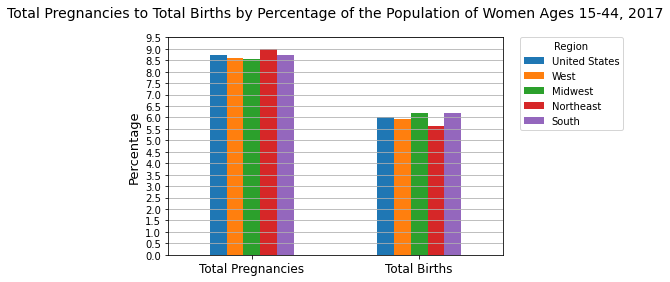

In [51]:
df_pcts_2017.loc[['PctTotalPregnancies', 'PctTotalBirths']].plot(kind='bar')
y = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5] # Making a list to set yticks.
plt.title('Total Pregnancies to Total Births by Percentage of the Population of Women Ages 15-44, 2017', pad=20, fontsize=14)
plt.legend(['United States', 'West', 'Midwest', 'Northeast', 'South'], title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) # Moving legend clear of graph.
plt.xticks(ticks=[0,1], labels=['Total Pregnancies', 'Total Births'], rotation = 0, fontsize=12)
plt.ylabel('Percentage', fontsize=13)
plt.yticks(y) # Inserting list of y-ticks.
plt.grid(axis='y')
plt.show()

### Conclusions
Interestingly, the Northeast has the highest percentage of pregnancies, but the lowest percentage of births. The percentage of pregnancies is remarkably consistent across regions. The percentage of births varies slightly more, but is still consistent.

### Questions and Statements for Further Data Exploration At A Later Date
1. I would like to learn how to visualize this data using a map of the United States.
2. I would like more years of data to see how the data changes over time.
3. I would like to figure out how to zoom in on the data in matplotlib to make my graphs legible    without a grid.
4. Which state has the smallest and largest population? Number of pregnancies? Number of Total  Births? Percent of Pregnancies? Percentage of Total Births?
5. How much of the decrease from pregnancies to births can be attributed to abortions, miscarriages,    or stillbirths? How will this change over time and in what regions?